Lambda School Data Science

*Unit 2, Sprint 1, Module 1*

---

# Regression 1

## Assignment

You'll use another **New York City** real estate dataset. 

But now you'll **predict how much it costs to rent an apartment**, instead of how much it costs to buy a condo.

The data comes from renthop.com, an apartment listing website.

- [ ] Look at the data. Choose a feature, and plot its relationship with the target.
- [ ] Use scikit-learn for linear regression with one feature. You can follow the [5-step process from Jake VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html#Basics-of-the-API).
- [ ] Define a function to make new predictions and explain the model coefficient.
- [ ] Organize and comment your code.

> [Do Not Copy-Paste.](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) You must type each of these exercises in, manually. If you copy and paste, you might as well not even do them. The point of these exercises is to train your hands, your brain, and your mind in how to read, write, and see code. If you copy-paste, you are cheating yourself out of the effectiveness of the lessons.

If your **Plotly** visualizations aren't working:
- You must have JavaScript enabled in your browser
- You probably want to use Chrome or Firefox
- You may need to turn off ad blockers
- [If you're using Jupyter Lab locally, you need to install some "extensions"](https://plot.ly/python/getting-started/#jupyterlab-support-python-35)

## Stretch Goals
- [ ] Do linear regression with two or more features.
- [ ] Read [The Discovery of Statistical Regression](https://priceonomics.com/the-discovery-of-statistical-regression/)
- [ ] Read [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf), Chapter 2.1: What Is Statistical Learning?

In [37]:
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'

# If you're working locally:
else:
    DATA_PATH = '../data/'
    
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

In [38]:
# Read New York City apartment rental listing data
import pandas as pd
df = pd.read_csv(DATA_PATH+'apartments/renthop-nyc.csv')
assert df.shape == (49352, 34)

In [39]:
# Remove outliers: 
# the most extreme 1% prices,
# the most extreme .1% latitudes, &
# the most extreme .1% longitudes
df = df[(df['price'] >= 1375) & (df['price'] <= 15500) & 
        (df['latitude'] >=40.57) & (df['latitude'] < 40.99) &
        (df['longitude'] >= -74.1) & (df['longitude'] <= -73.38)]

In [40]:
#Drop NAs, clean up data
df = df.dropna()

In [41]:
# See what's the shape of df
df.shape

(47261, 34)

In [42]:
# See what features there are
df.columns

Index(['bathrooms', 'bedrooms', 'created', 'description', 'display_address',
       'latitude', 'longitude', 'price', 'street_address', 'interest_level',
       'elevator', 'cats_allowed', 'hardwood_floors', 'dogs_allowed',
       'doorman', 'dishwasher', 'no_fee', 'laundry_in_building',
       'fitness_center', 'pre-war', 'laundry_in_unit', 'roof_deck',
       'outdoor_space', 'dining_room', 'high_speed_internet', 'balcony',
       'swimming_pool', 'new_construction', 'terrace', 'exclusive', 'loft',
       'garden_patio', 'wheelchair_access', 'common_outdoor_space'],
      dtype='object')

In [43]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np

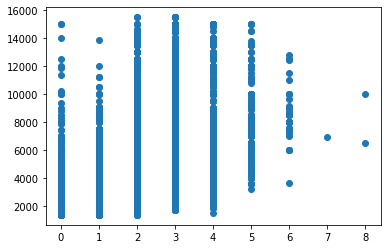

In [44]:
# Plot relationship between bedrooms and price 
fig, ax = plt.subplots(1)
ax.scatter(x = df['bedrooms'], y = df['price'], label="Observed data")

In [45]:
#Chose class of model
from sklearn.linear_model import LinearRegression

# Chose hyperparameters
model = LinearRegression()

In [46]:
# Arrange data into feature matrix and target vector
# We'll use bedrooms as our feature
data = {'Bedrooms': df['bedrooms']}

X = pd.DataFrame(data)
# Then, make the y target column
data = {'price': df['price']}

y = pd.DataFrame(data)

In [47]:
# Check the shape of the matrix
X.shape

(47261, 1)

In [48]:
# Check the shape of the target vector
y.shape

(47261, 1)

In [49]:
# Fit model to data
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [50]:
# Check the M1 value, then check the M0 value (intercept)
print(model.coef_.flatten())
print(model.intercept_)

[854.85644793]
[2258.09977109]


In [52]:
# Function to make predictions
def price_predictor(bedrooms):
  return model.coef_.flatten()[0]*bedrooms + model.intercept_[0]

In [53]:
# Test out the function
price_predictor(5)

6532.382010758807

In [54]:
# Generate the line from the model coefficients
x_line = X
y_line = model.coef_.flatten()*x_line + model.intercept_

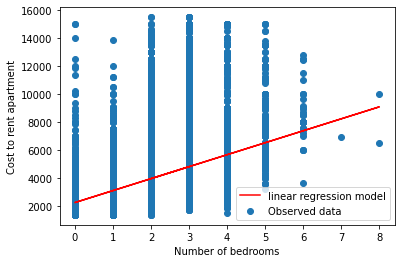

In [55]:
# Create the figure and axes objects
fig, ax = plt.subplots(1)
ax.scatter(x = X, y = y, label="Observed data")
ax.plot(x_line, y_line, color='r', label="linear regression model")
ax.set_xlabel('Number of bedrooms')
ax.set_ylabel('Cost to rent apartment')
ax.legend()

#plt.show()
plt.show()

Explanation for coefficients:

` Appartments are estimated to cost a default value of 2258 dollars, and their prices increase by 855 dollars for every bedrooms they have `

In [56]:
data = {'Bedrooms': df['bedrooms'], 'Bathrooms': df['bathrooms']}

X = pd.DataFrame(data)
data = {'price': df['price']}

y = pd.DataFrame(data)

In [57]:
# Fit model to data
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [58]:
# Check the M1 value, then check the M0 value (intercept)
print(model.coef_.flatten())
print(model.intercept_)

[ 386.03270602 2094.03614288]
[462.09423961]


`In this case, the model predicts any apartment to cost a minimum value of 462 dollars, with the renting increasing by 386 dollars for every bathroom in the hourse, and 2094 dollars for every bedroom in the apartment.`

In [59]:
# Function to make predictions
def price_predictor(bedrooms, bathrooms):
  return model.coef_.flatten()[0]*bathrooms + model.coef_.flatten()[1]*bedrooms  + model.intercept_[0]

In [60]:
price_predictor(5, 3)

12090.37307206329

In [61]:
# Generate the line from the model coefficients
x_line = X['Bathrooms']
x_line_2 = X['Bedrooms']
y_line = model.coef_.flatten()[0]*x_line + model.coef_.flatten()[1]*x_line_2 + model.intercept_

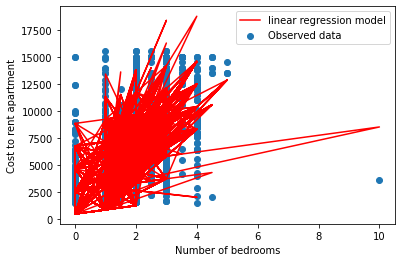

In [62]:
# Create the figure and axes objects
fig, ax = plt.subplots(1)
ax.scatter(x = X['Bathrooms'], y = y, label="Observed data")
ax.plot(x_line, y_line, color='r', label="linear regression model")
ax.set_xlabel('Number of bedrooms')
ax.set_ylabel('Cost to rent apartment')
ax.legend()

#plt.show()
plt.show()